# ***ESPECIALIZACI√ìN EN CIENCIA DE DATOS E INTELIGENCIA ARTIFICIAL***
### **Asignatura:**  Proyecto I

**Presentado por:** 
- Jonatan Andres Londo√±o Taborda
- John Freddy Ossa Pati√±o
- Felipe Londo√±o Mendoza

--------------------------------------------

# üìò Contexto del Proyecto

El presente trabajo tiene como objetivo construir un modelo supervisado de clasificaci√≥n que permita automatizar la decisi√≥n sobre el tratamiento de √≥rdenes de desviaciones significativas en consumos de los servicios de energ√≠a, acueducto, alcantarillado y gas que presta Empresas P√∫blicas de Medell√≠n (EPM) a sus clientes, generadas cuando se detectan consumos que se salen de unos rangos establecidos por ley en un periodo determinado.

Actualmente, estas √≥rdenes son revisadas manualmente por un equipo de analistas que determina si deben legalizar o enviarse una revisi√≥n a terreno para tener mas argumentos. El desarrollo de este modelo busca replicar ese proceso humano a partir de datos hist√≥ricos, con el fin de reducir visitas innecesarias y optimizar los costos operativos asociados.

---

## üß™ Proceso de An√°lisis

Para lograr este objetivo, se ejecutar√° el siguiente flujo de trabajo:

1. **An√°lisis Exploratorio de Datos (EDA)**
2. **Depuraci√≥n y preparaci√≥n de los datos**
3. **Entrenamiento y comparaci√≥n de modelos de clasificaci√≥n**:
   - Regresi√≥n Log√≠stica
   - Random Forest
   - XGBoost Lineal
4. **Conclusiones**

---

## üìä Evaluaci√≥n y M√©tricas

- Se evaluar√° el desempe√±o de cada modelo utilizando la m√©trica F1 Score, ideal para escenarios con datos desbalanceados, ya que equilibra la precisi√≥n.
- La divisi√≥n de los datos ser√° del 80% para entrenamiento y 20% para prueba.

Adem√°s, el modelo generar√° una probabilidad de legalizaci√≥n para cada orden. Si esta probabilidad supera el 80%, se considerar√° que la orden puede ser legalizada autom√°ticamente, sin la intervenci√≥n de un analista.

---


## üìÇ Descripci√≥n de los Datos

Para el entrenamiento del modelo supervisado de clasificaci√≥n se cuenta con un conjunto de datos hist√≥ricos que contiene informaci√≥n sobre √≥rdenes de desviaci√≥n significativa generadas por incrementos en el consumo de servicios p√∫blicos. Estas √≥rdenes fueron previamente revisadas por analistas, quienes tomaron decisiones basadas en las condiciones observadas.

### üéØ Variable Objetivo: `RESPUESTA`

La variable `RESPUESTA` representa la decisi√≥n final tomada por el analista, y se comporta de la siguiente manera:

| Caso | ¬øModifica Consumo? | ¬øEnv√≠a a terreno? | RESPUESTA |
|------|--------------------|-------------------|-----------|
| 1    | S√≠                 | No                | 1         |
| 2    | S√≠                 | S√≠                | 1         |
| 3    | No                 | S√≠                | 1         |
| 4    | No                 | No                | 0         |

#### üß† Interpretaci√≥n de los casos:
- **Caso 1:** El analista detecta un error claro en el consumo y lo ajusta sin necesidad de verificaci√≥n en terreno.
- **Caso 2:** El analista ajusta parcialmente el consumo, pero requiere una visita en terreno para validar la parte restante antes de decidir su facturaci√≥n definitiva.
- **Caso 3:** El analista no ajusta el consumo por falta de evidencia suficiente, pero mantiene dudas que requieren una inspecci√≥n en terreno.
- **Caso 4:** El consumo investigado es considerado v√°lido y no necesita ajustes ni verificaci√≥n en terreno.

Por tanto, la clase `1` agrupa todas las situaciones en las que se toma alguna acci√≥n correctiva o preventiva adicional, mientras que la clase `0` representa los casos cerrados sin intervenci√≥n alguna.

---

### üßæ Variables Predictoras

Las dem√°s columnas del dataset representan condiciones observadas por el analista en el momento de tomar la decisi√≥n, y ser√°n utilizadas como **variables predictoras** en el modelo. Estas incluyen, entre otras:

|Contador| Variable         | Definici√≥n                                                                       | Valores                                                                                |
|--------|------------------|----------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|
|1       | RESPUESTA        | decisi√≥n final tomada por el analista.                                           |1 = Se tom√≥ acci√≥n, 0 = No se tom√≥ ninguna acci√≥n                                       |
|2       | CONSUMO_CRITICADO| Valor del consumo que se encuentra en investigaci√≥n.                             |                                                                                        |
|3       | SERVICIO         | Tipo de servicio involucrado (agua, energ√≠a, etc.).                              |                                                                                        |
|4       | CATEGORIA        | Segmento del usuario (residencial, industrial, etc.).                            |                                                                                        |
|5       | NIVEL_TENSION    | Indica el nivel de voltaje al que se suministra el servicio de energ√≠a el√©ctrica.|                                                                                        |
|6       | ESTRATO          | Estrato socio economico del predio.                                              |1 = Estrato 1, 2 = Estrato 2, 3 = Estrato 3, 4 = Estrato 4, 5 = Estrato 5, 6 = Estrato 6|
|7       | LOCALIDAD        | Municipio donde se se presta el servicio.                                        |                                                                                        |
|8       | FUNCION_ANALISIS | Algoritmo o l√≥gica aplicada para el an√°lisis del consumo.                        |                                                                                        |
|9       | CALIFICACION     | Clasificaci√≥n del nivel de desviaci√≥n identificado.                              |                                                                                        |
|10      | OBS_LECTURA      | Observaciones sobre la lectura del medidor que realiza el lector.                |                                                                                        |
|11      | PERIODICIDAD     | Frecuencia o periodicidad con la que se factura el servicio.                     | 1 = Mensual, 2 = Bimestral, 3 = Trimestral                                             |


**Cantidad de observaciones**: 85.812

Estas variables permitir√°n al modelo aprender de los patrones y comportamientos hist√≥ricos, con el objetivo de replicar las decisiones de los analistas en nuevos casos.

---


# *1.Carga de datos y an√°lisis exploratorio de los datos (EDA)*

In [40]:
#Importaci√≥n de la librer√≠as que se usar√°n
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [42]:
mapeo_columnas = {
    'RESPUESTA': 'respuesta', 
    'CONSUMO_CRITICADO': 'consumo_criticado', 
    'SERVICIO': 'servicio',
    'CATEGORIA': 'categoria', 
    'NIVEL_TENSION': 'nivel_tension', 
    'ESTRATO': 'estrato', 
    'LOCALIDAD': 'localidad', 
    'FUNCION_ANALISIS': 'funcion_analisis',
    'CALIFICACION': 'calificacion',
    'OBS_LECTURA': 'obs_lectura',
    'PERIODICIDAD': 'periodicidads'
}

In [43]:
# Cargar el set de datos
archivo = "BD_ordenes.xlsx"
df = pd.read_excel(archivo)

df = df.rename(columns=mapeo_columnas)

df.head()

respuesta  consumo_criticado                  servicio      categoria  \
0          1                0.0  701-ENERG√çA MDO REGULADO   3-INDUSTRIAL   
1          1              420.0  701-ENERG√çA MDO REGULADO   3-INDUSTRIAL   
2          1            99999.0          101-AGUA POTABLE  1-RESIDENCIAL   
3          1              881.0  701-ENERG√çA MDO REGULADO   3-INDUSTRIAL   
4          1            99999.0  701-ENERG√çA MDO REGULADO  1-RESIDENCIAL   

   nivel_tension  estrato      localidad  \
0          220.0      NaN     5088-BELLO   
1          220.0      NaN     5088-BELLO   
2            NaN      1.0     5088-BELLO   
3          220.0      NaN     5088-BELLO   
4          220.0      4.0  5001-MEDELL√çN   

                                    funcion_analisis  \
0  CALCCOPR - Calcular Consumo Penalizado de Ener...   
1  CALCCOPR - Calcular Consumo Penalizado de Ener...   
2           CALCCOLE - Calcular Consumo por Lecturas   
3           CALCCOLE - Calcular Consumo por Lecturas   
4           CALCCOLE - Calcular Consumo por Lecturas   

                calificacion                        obs_lectura  periodicidads  
0  5035-BAJO ENERGIA (<-50%)  30-VARIACION NIVEL DE UTILIZACI√ìN              1  
1      5080-MUY ALTO (>500%)  30-VARIACION NIVEL DE UTILIZACI√ìN              1  
2      5080-MUY ALTO (>500%)                   34-LECTURA MENOR              1  
3      5080-MUY ALTO (>500%)            35-NO HAY JUSTIFICACION              1  
4      5080-MUY ALTO (>500%)                   34-LECTURA MENOR              1

In [44]:
#Cantidad de √≥rdenes por respuesta del analista
(df['respuesta'].value_counts(normalize=True) * 100).round(2).astype(str) + ' %'

respuesta
1    65.98 %
0    34.02 %
Name: proportion, dtype: object

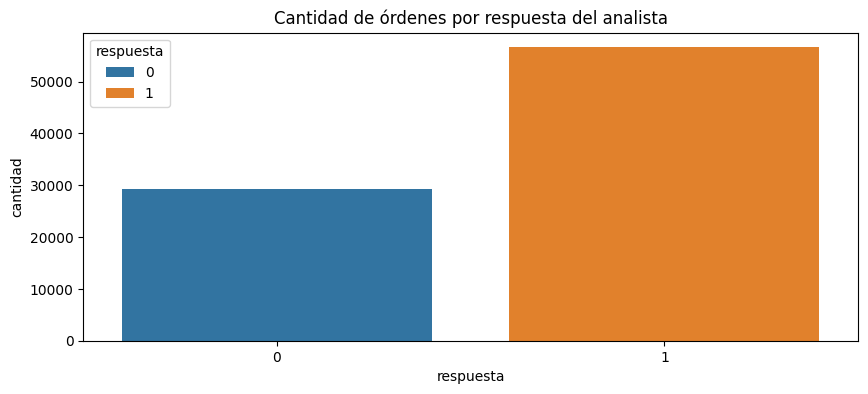

In [45]:
plt.figure(figsize=(10, 4))
sns.countplot(x='respuesta', hue='respuesta', data=df)
plt.ylabel('cantidad')
plt.title('Cantidad de √≥rdenes por respuesta del analista');


El gr√°fico anterior muestra la cantidad de √≥rdenes clasificadas por los analistas seg√∫n la variable respuesta, la cual indica si se tom√≥ alguna acci√≥n (1) o no (0).

Existe un desbalance moderado en las respuestas:

respueta (1): 65.98%

respueta (0): 34.02%

Aunque respuesta = 1 es claramente dominante, la clase 0 todav√≠a representa una proporci√≥n considerable del total.

---

---

In [46]:
# Agrupar por SERVICIO y obtener conteo de RESPUESTA
tabla_resumen = df.groupby('servicio')['respuesta'].value_counts().unstack(fill_value=0)

# Agregar columna con total por servicio
tabla_resumen['TOTAL'] = tabla_resumen.sum(axis=1)

# Ordenar de forma descendente
tabla_resumen_ordenada = tabla_resumen.sort_values(by='TOTAL', ascending=False)

# Mostrar resultado
tabla_resumen_ordenada


respuesta                                0      1  TOTAL
servicio                                                
101-AGUA POTABLE                     12916  24899  37815
701-ENERG√çA MDO REGULADO              7013  17540  24553
501-GAS NATURAL REGULADO              2403   4591   6994
249-AGUA POTABLE DE RIONEGRO ANT      4025   1908   5933
8003-AGUA POTABLE URABA               1285   2936   4221
240-AGUA POTABLE MALAMBO               397   2320   2717
7505-GAS NATURAL COMPRIMIDO (GNC)      462   1392   1854
8000-AGUA POTABLE OCC.                 659    963   1622
103-ALCANTARILLADO                       4     58     62
1007-ALUMBRADO P√öBLICO MEDIDO           23      8     31
1702-MOVILIDAD EL√âCTRICA CARGA INTE      6      3      9

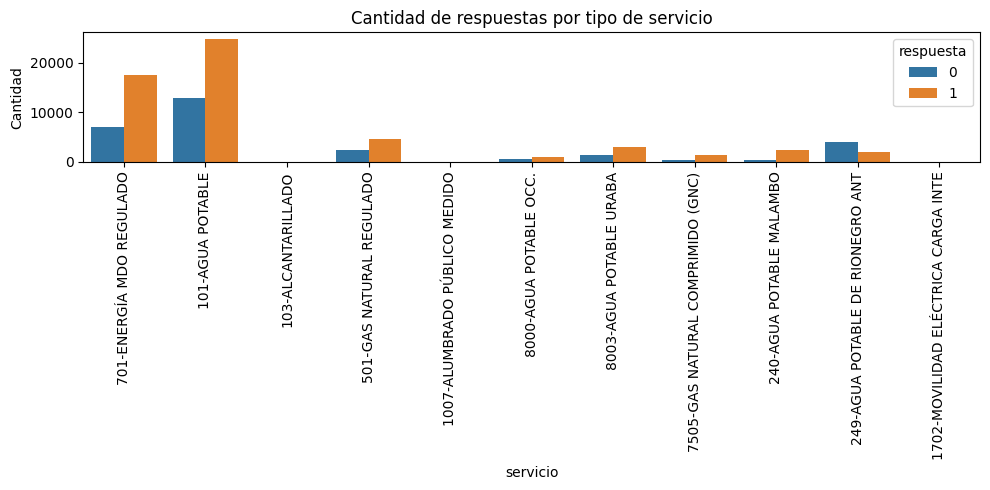

In [47]:
plt.figure(figsize=(10, 5))
sns.countplot(x='servicio', hue='respuesta', data=df)
plt.title("Cantidad de respuestas por tipo de servicio")
plt.xlabel("servicio")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

La tabla y el gr√°fico anterior muestran la distribuci√≥n de respuestas (respuesta = 0 o 1) por tipo de servicio. Se destacan los siguientes puntos:

1. 101-AGUA POTABLE es el servicio con mayor cantidad de √≥rdenes registradas, acumulando m√°s de 37.800 casos, de los cuales ~66% tuvieron una acci√≥n del analista (respuesta = 1)
2. 701-ENERG√çA MDO REGULADO le sigue en volumen, con m√°s de 24.500 registros, tambi√©n con una alta proporci√≥n de respuestas afirmativas. 
3. 501-GAS NATURAL REGULADO y 249-AGUA POTABLE DE RIONEGRO ANT tienen menor participaci√≥n, pero a√∫n representan vol√∫menes importantes para el entrenamiento del modelo.

En todos los servicios, la clase respuesta = 1 predomina, lo que sugiere que la mayor√≠a de las √≥rdenes implicaron una acci√≥n por parte del analista (modificaci√≥n del consumo y/o solicitud de visita en terreno). No obstante, hay diferencias entre servicios. Por ejemplo, en "249-AGUA POTABLE DE RIONEGRO ANT", el n√∫mero de respuestas 0 supera al de respuestas 1, lo cual es una se√±al de comportamiento distinto respecto a los dem√°s servicios.

---

---

In [48]:
# Agrupar por SERVICIO y obtener conteo de RESPUESTA
tabla_resumen = df.groupby('localidad')['respuesta'].value_counts().unstack(fill_value=0)

# Agregar columna con total por servicio
tabla_resumen['TOTAL'] = tabla_resumen.sum(axis=1)

# Ordenar de forma descendente
tabla_resumen_ordenada = tabla_resumen.sort_values(by='TOTAL', ascending=False)

# Mostrar resultado
tabla_resumen_ordenada

respuesta                   0      1  TOTAL
localidad                                  
5001-MEDELL√çN            9175  19580  28755
5266-ENVIGADO            5425  10060  15485
5615-RIONEGRO            4611   3292   7903
5045-APARTAD√ì            1569   5584   7153
5088-BELLO               2212   4157   6369
...                       ...    ...    ...
5125-CAICEDO                0      1      1
5660-SAN LUIS               0      1      1
5674-SAN VICENTE FERRER     0      1      1
5501-OLAYA                  0      1      1
5837-TURBO                  0      1      1

[76 rows x 3 columns]

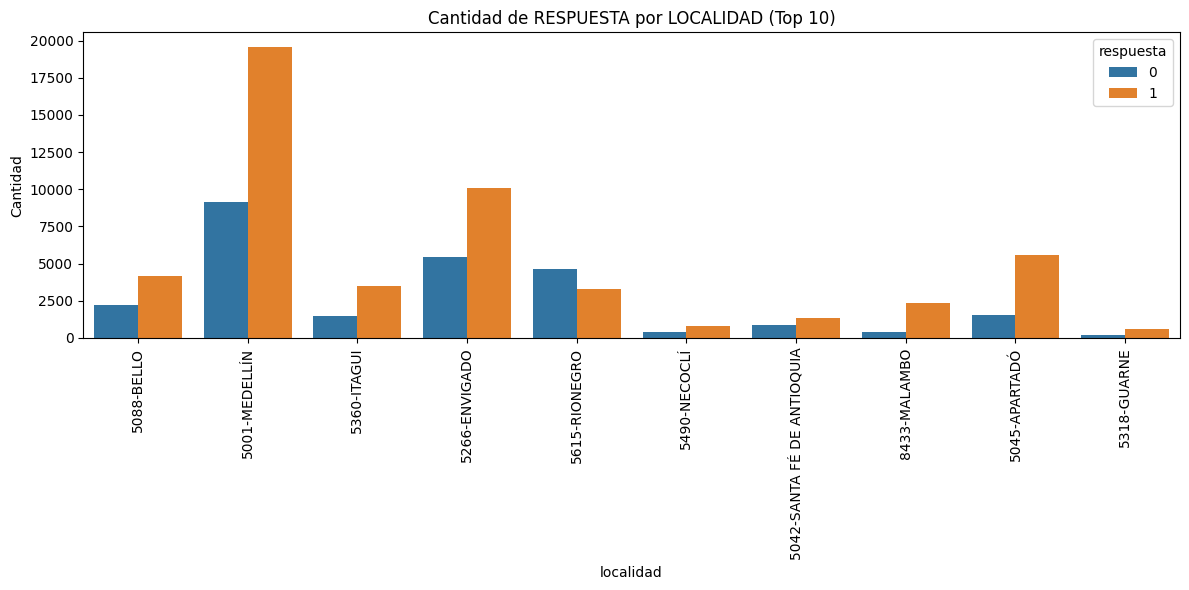

In [49]:
plt.figure(figsize=(12, 6))
top_localidades = df['localidad'].value_counts().nlargest(10).index
#top_localidades = df['localidad'].value_counts().index
df_localidad_top = df[df['localidad'].isin(top_localidades)]
sns.countplot(x='localidad', hue='respuesta', data=df_localidad_top)
plt.title("Cantidad de RESPUESTA por LOCALIDAD (Top 10)")
plt.xlabel("localidad")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

El gr√°fico y la tabla muestran la distribuci√≥n de la variable respuesta por localidad, permitiendo identificar patrones de decisi√≥n seg√∫n la zona geogr√°fica.

1. 5001-MEDELL√çN concentra la mayor cantidad de √≥rdenes (28.755), con una fuerte predominancia de acciones (respuesta = 1 en ~68% de los casos).
2. 5266-ENVIGADO y 5615-RIONEGRO tambi√©n presentan vol√∫menes altos, aunque en Rionegro el n√∫mero de respuestas 0 es relativamente elevado comparado con otras zonas.

La mayor√≠a de las localidades presentan una tendencia consistente: en m√°s del 60% de los casos, los analistas decidieron intervenir o solicitar revisi√≥n. Sin embargo, hay variaciones notables entre localidades como Rionegro, donde hay m√°s decisiones de no intervenir (respuesta = 0), lo que podr√≠a deberse a mejores registros de lectura o menor complejidad en los casos

---

---

In [50]:
# Agrupar por SERVICIO y obtener conteo de RESPUESTA
tabla_resumen = df.groupby('categoria')['respuesta'].value_counts().unstack(fill_value=0)

# Agregar columna con total por servicio
tabla_resumen['TOTAL'] = tabla_resumen.sum(axis=1)

# Ordenar de forma descendente
tabla_resumen_ordenada = tabla_resumen.sort_values(by='TOTAL', ascending=False)

# Mostrar resultado
tabla_resumen_ordenada

respuesta                        0      1  TOTAL
categoria                                       
1-RESIDENCIAL                25063  45940  71003
2-COMERCIAL                   2403   6483   8886
3-INDUSTRIAL                  1035   3443   4478
4-OFICIAL                      455    578   1033
11-CONSUMOS EPMTELCO           138     43    181
5-ESPECIAL                      36     73    109
7-AUTOCONSUMOS EPM              47     31     78
5-EXENTA                        15     24     39
14-ENERGIA BOMBEO ACUEDUCTO      1      3      4

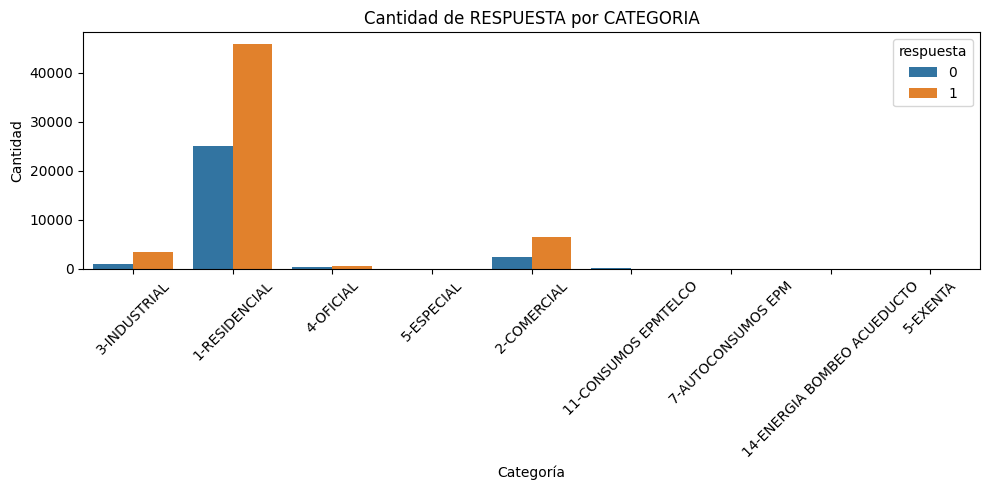

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(x='categoria', hue='respuesta', data=df)
plt.title("Cantidad de RESPUESTA por CATEGORIA")
plt.xlabel("Categor√≠a")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La variable categoria agrupa a los usuarios seg√∫n su tipo de consumo (residencial, comercial, industrial, etc.). El an√°lisis muestra c√≥mo se distribuyen las respuestas de los analistas en cada una de estas categor√≠as.

1. 1-RESIDENCIAL domina claramente el conjunto de datos con m√°s de 71.000 √≥rdenes (~80% del total). Le siguen 2-COMERCIAL y 3-INDUSTRIAL, aunque con vol√∫menes considerablemente menores (8.800 y 4.400 registros, respectivamente).

2. En todas las categor√≠as, predomina la respuesta 1, es decir, que en la mayor√≠a de los casos los analistas decidieron intervenir o solicitar revisi√≥n.
3. La categor√≠a residencial tiene una proporci√≥n de respuesta = 1 cercana al 65%.

---

---

In [64]:
# Agrupar por estrato y respuesta
tabla_estrato = df.groupby('estrato')['respuesta'].value_counts().unstack(fill_value=0)
tabla_estrato['TOTAL'] = tabla_estrato.sum(axis=1)
tabla_estrato_ordenada = tabla_estrato.sort_values(by='estrato')
tabla_estrato_ordenada

respuesta     0      1  TOTAL
estrato                      
0.0        4130  10678  14808
1.0        3059   7918  10977
2.0        4004   9627  13631
3.0        5935  11028  16963
4.0        4890   6887  11777
5.0        5182   7170  12352
6.0        1993   3310   5303

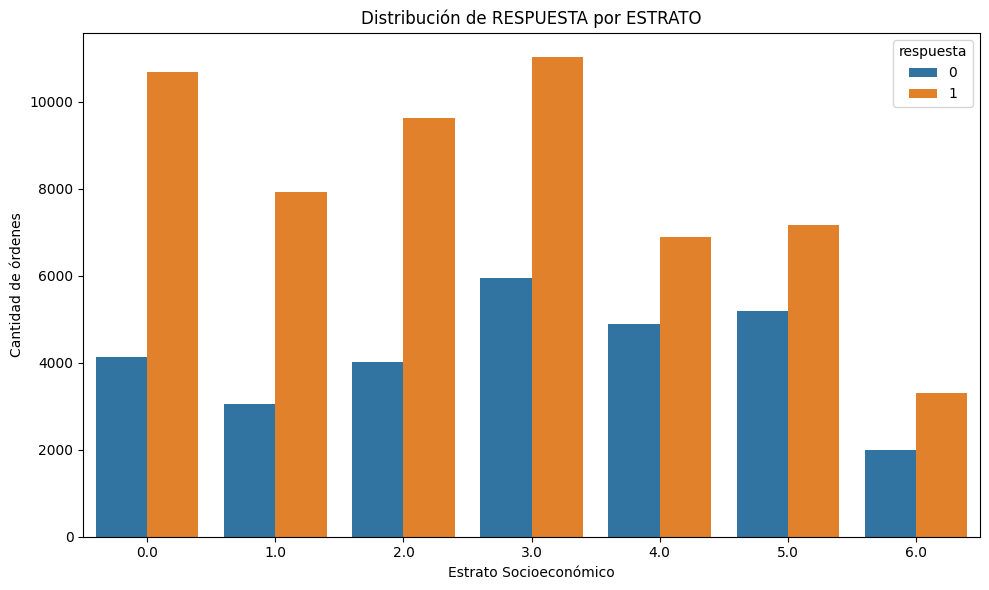

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='estrato', hue='respuesta', data=df)
plt.title("Distribuci√≥n de RESPUESTA por ESTRATO")
plt.xlabel("Estrato Socioecon√≥mico")
plt.ylabel("Cantidad de √≥rdenes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

1. Los estratos 3 y 2 concentran la mayor cantidad de √≥rdenes.
2. En todos los estratos, predomina la clase respuesta = 1, es decir, la mayor√≠a de las √≥rdenes requirieron una acci√≥n del analista (modificaci√≥n o revisi√≥n).
3. El estrato 0, que corresponde a registros sin estrato definido, tambi√©n presenta una proporci√≥n significativa de respuestas afirmativas.

No se observan diferencias radicales entre estratos en cuanto al patr√≥n de decisi√≥n, pero s√≠ se evidencia que los estratos bajos (0, 1, 2) tienden a tener una mayor proporci√≥n relativa de intervenci√≥n (respuesta = 1). Esto podr√≠a indicar que en contextos de menor capacidad socioecon√≥mica se presentan m√°s casos que generan dudas en el consumo o mayor sensibilidad ante desviaciones.

Por otro lado, en estratos altos (como el 4), aunque hay menos volumen total, la tendencia se mantiene con un 58%‚Äì60% de intervenciones.

# *2.Depuraci√≥n y preparaci√≥n de los datos*

In [68]:
#Rellenar los nulos correspondientes a la variable "estrato" con cero.
df['estrato'] = df['estrato'].fillna(0)

In [81]:
#Cantidad de observaciones por nivel de tensi√≥n

tabla_nivel_tension = df['nivel_tension'].value_counts(dropna=False).reset_index()
tabla_nivel_tension.columns = ['nivel_tension', 'cantidad_observaciones']
total_observaciones = tabla_nivel_tension['cantidad_observaciones'].sum()
tabla_nivel_tension['porcentaje'] = (tabla_nivel_tension['cantidad_observaciones'] / total_observaciones * 100).round(2).astype(str) + ' %'
tabla_nivel_tension

nivel_tension  cantidad_observaciones porcentaje
0            NaN                   61218    71.34 %
1          220.0                   23627    27.53 %
2        13200.0                     928     1.08 %
3        44000.0                      38     0.04 %

### Nivel de tensi√≥n
1. Esta variable solo aplica para el servicio de energ√≠a (ej. 701-ENERG√çA MDO REGULADO), por lo que en otros servicios como agua, gas o alcantarillado, su valor es nulo o irrelevante.
2. En el caso del servicio de energ√≠a, existe una alta correlaci√≥n entre nivel_tension y categoria. Por ejemplo:
 * Residencial: baja tensi√≥n
 * Industrial: media o alta tensi√≥n
 * Oficial o comercial: tensi√≥n media

### Conclusiones
Dado que nivel_tension solo es aplicable a un subconjunto de datos (energ√≠a), presenta alta correlaci√≥n con la variable categoria y tiene variabilidad limitada y muchos valores nulos, se recomienda excluir esta variable del entrenamiento del modelo para evitar introducir ruido o redundancia

## *Feature Engineering*

In [55]:
# Diccionario de mapeo de servicio a tipo de servicio
mapeo_tipo_servicio = {
    '701-ENERG√çA MDO REGULADO': 'Energ√≠a',
    '101-AGUA POTABLE': 'Agua',
    '103-ALCANTARILLADO': 'Alcantarillado',
    '501-GAS NATURAL REGULADO': 'Gas',
    '1007-ALUMBRADO P√öBLICO MEDIDO': 'Energ√≠a',
    '8000-AGUA POTABLE OCC.': 'Agua',
    '8003-AGUA POTABLE URABA': 'Agua',
    '7505-GAS NATURAL COMPRIMIDO (GNC)': 'Gas',
    '240-AGUA POTABLE MALAMBO': 'Agua',
    '249-AGUA POTABLE DE RIONEGRO ANT': 'Agua',
    '1702-MOVILIDAD EL√âCTRICA CARGA INTE': 'Energ√≠a'
}

In [56]:
# Crear nueva columna 'tipo_servicio'
df['tipo_servicio'] = df['servicio'].map(mapeo_tipo_servicio)
df

respuesta  consumo_criticado                  servicio      categoria  \
0              1                0.0  701-ENERG√çA MDO REGULADO   3-INDUSTRIAL   
1              1              420.0  701-ENERG√çA MDO REGULADO   3-INDUSTRIAL   
2              1            99999.0          101-AGUA POTABLE  1-RESIDENCIAL   
3              1              881.0  701-ENERG√çA MDO REGULADO   3-INDUSTRIAL   
4              1            99999.0  701-ENERG√çA MDO REGULADO  1-RESIDENCIAL   
...          ...                ...                       ...            ...   
85806          1                2.0  701-ENERG√çA MDO REGULADO    2-COMERCIAL   
85807          1                0.0  701-ENERG√çA MDO REGULADO    2-COMERCIAL   
85808          1              504.5  701-ENERG√çA MDO REGULADO    2-COMERCIAL   
85809          1                0.0  701-ENERG√çA MDO REGULADO    2-COMERCIAL   
85810          1                0.0  701-ENERG√çA MDO REGULADO    2-COMERCIAL   

       nivel_tension  estrato      localidad  \
0              220.0      0.0     5088-BELLO   
1              220.0      0.0     5088-BELLO   
2                NaN      1.0     5088-BELLO   
3              220.0      0.0     5088-BELLO   
4              220.0      4.0  5001-MEDELL√çN   
...              ...      ...            ...   
85806          220.0      0.0  5615-RIONEGRO   
85807          220.0      0.0  5615-RIONEGRO   
85808          220.0      0.0  5615-RIONEGRO   
85809          220.0      0.0  5615-RIONEGRO   
85810          220.0      0.0  5615-RIONEGRO   

                                        funcion_analisis  \
0      CALCCOPR - Calcular Consumo Penalizado de Ener...   
1      CALCCOPR - Calcular Consumo Penalizado de Ener...   
2               CALCCOLE - Calcular Consumo por Lecturas   
3               CALCCOLE - Calcular Consumo por Lecturas   
4               CALCCOLE - Calcular Consumo por Lecturas   
...                                                  ...   
85806  CALCCOPR - Calcular Consumo Penalizado de Ener...   
85807  CALCCOPR - Calcular Consumo Penalizado de Ener...   
85808  CALCCOPR - Calcular Consumo Penalizado de Ener...   
85809  CALCCOPR - Calcular Consumo Penalizado de Ener...   
85810  CALCCOPR - Calcular Consumo Penalizado de Ener...   

                    calificacion                        obs_lectura  \
0      5035-BAJO ENERGIA (<-50%)  30-VARIACION NIVEL DE UTILIZACI√ìN   
1          5080-MUY ALTO (>500%)  30-VARIACION NIVEL DE UTILIZACI√ìN   
2          5080-MUY ALTO (>500%)                   34-LECTURA MENOR   
3          5080-MUY ALTO (>500%)            35-NO HAY JUSTIFICACION   
4          5080-MUY ALTO (>500%)                   34-LECTURA MENOR   
...                          ...                                ...   
85806          2-ENV√çA A CR√çTICA         0-SIN CAUSA NI OBSERVACI√ìN   
85807          2-ENV√çA A CR√çTICA         0-SIN CAUSA NI OBSERVACI√ìN   
85808          2-ENV√çA A CR√çTICA         0-SIN CAUSA NI OBSERVACI√ìN   
85809          2-ENV√çA A CR√çTICA  30-VARIACION NIVEL DE UTILIZACI√ìN   
85810          2-ENV√çA A CR√çTICA  30-VARIACION NIVEL DE UTILIZACI√ìN   

       periodicidads tipo_servicio  
0                  1       Energ√≠a  
1                  1       Energ√≠a  
2                  1          Agua  
3                  1       Energ√≠a  
4                  1       Energ√≠a  
...              ...           ...  
85806              1       Energ√≠a  
85807              1       Energ√≠a  
85808              1       Energ√≠a  
85809              1       Energ√≠a  
85810              1       Energ√≠a  

[85811 rows x 12 columns]

## *Proceso de Label encoder*

In [52]:
df_modelo = df.copy()

In [53]:
df_modelo['CODIGO_SERVICIO'] = df_modelo['SERVICIO'].str.split('-', n=1).str[0]
df_modelo.drop(columns=['SERVICIO'], inplace=True)

df_modelo['CODIGO_OBSERVACION'] = df_modelo['OBS_LECTURA'].str.split('-', n=1).str[0]
df_modelo.drop(columns=['OBS_LECTURA'], inplace=True)

df_modelo['CODIGO_CALIFICACION'] = df_modelo['CALIFICACION'].str.split('-', n=1).str[0]
df_modelo.drop(columns=['CALIFICACION'], inplace=True)

df_modelo['CODIGO_LOCALIDAD'] = df_modelo['LOCALIDAD'].str.split('-', n=1).str[0]
df_modelo.drop(columns=['LOCALIDAD'], inplace=True)

df_modelo['CODIGO_CATEGORIA'] = df_modelo['CATEGORIA'].str.split('-', n=1).str[0]
df_modelo.drop(columns=['CATEGORIA'], inplace=True)

In [54]:

# Columnas categ√≥ricas a codificar
columnas_categoricas = ['FUNCION_ANALISIS']

# Inicializar codificadores
encoders = {}
for col in columnas_categoricas:
    le = LabelEncoder()
    df_modelo[col] = le.fit_transform(df_modelo[col].astype(str))
    encoders[col] = le  # Guardamos el encoder para posibles decodificaciones posteriores

# Verificar resultado
df_modelo.head()

RESPUESTA  CONSUMO_CRITICADO  NIVEL_TENSION  ESTRATO  FUNCION_ANALISIS  \
0          1                0.0          220.0      NaN                 3   
1          1              420.0          220.0      NaN                 3   
2          1            99999.0            NaN      1.0                 2   
3          1              881.0          220.0      NaN                 2   
4          1            99999.0          220.0      4.0                 2   

   PERIODICIDAD CODIGO_SERVICIO CODIGO_OBSERVACION CODIGO_CALIFICACION  \
0             1             701                 30                5035   
1             1             701                 30                5080   
2             1             101                 34                5080   
3             1             701                 35                5080   
4             1             701                 34                5080   

  CODIGO_LOCALIDAD CODIGO_CATEGORIA  
0             5088                3  
1             5088                3  
2             5088                1  
3             5088                3  
4             5001                1

In [55]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85811 entries, 0 to 85810
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RESPUESTA            85811 non-null  int64  
 1   CONSUMO_CRITICADO    85811 non-null  float64
 2   NIVEL_TENSION        24593 non-null  float64
 3   ESTRATO              71003 non-null  float64
 4   FUNCION_ANALISIS     85811 non-null  int32  
 5   PERIODICIDAD         85811 non-null  int64  
 6   CODIGO_SERVICIO      85811 non-null  object 
 7   CODIGO_OBSERVACION   85811 non-null  object 
 8   CODIGO_CALIFICACION  85811 non-null  object 
 9   CODIGO_LOCALIDAD     85811 non-null  object 
 10  CODIGO_CATEGORIA     85811 non-null  object 
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 6.9+ MB


In [56]:
df_modelo.describe()

RESPUESTA  CONSUMO_CRITICADO  NIVEL_TENSION       ESTRATO  \
count  85811.000000       8.581100e+04   24593.000000  71003.000000   
mean       0.659799       4.264194e+07     777.438295      3.236680   
std        0.473779       4.818349e+09    3001.450014      1.512711   
min        0.000000      -1.600808e+06     220.000000      1.000000   
25%        0.000000       0.000000e+00     220.000000      2.000000   
50%        1.000000       1.250000e+01     220.000000      3.000000   
75%        1.000000       1.550000e+02     220.000000      4.000000   
max        1.000000       7.333327e+11   44000.000000      6.000000   

       FUNCION_ANALISIS  PERIODICIDAD  
count      85811.000000  85811.000000  
mean           4.412313      1.102073  
std            2.827490      0.427672  
min            0.000000      1.000000  
25%            2.000000      1.000000  
50%            3.000000      1.000000  
75%            6.000000      1.000000  
max           13.000000      3.000000

## *Medidas y gr√°ficas descriptivas multivariadas*

In [57]:
df_modelo.corr()

RESPUESTA  CONSUMO_CRITICADO  NIVEL_TENSION   ESTRATO  \
RESPUESTA             1.000000          -0.004129       0.066111 -0.100899   
CONSUMO_CRITICADO    -0.004129           1.000000       0.204490 -0.009655   
NIVEL_TENSION         0.066111           0.204490       1.000000       NaN   
ESTRATO              -0.100899          -0.009655            NaN  1.000000   
FUNCION_ANALISIS     -0.014113          -0.000442      -0.055757 -0.180379   
PERIODICIDAD         -0.027790          -0.002110      -0.084617 -0.308941   
CODIGO_SERVICIO       0.024368          -0.001293      -0.006348 -0.255220   
CODIGO_OBSERVACION    0.214283           0.002943       0.046699  0.229940   
CODIGO_CALIFICACION   0.096435          -0.012312      -0.004647  0.185263   
CODIGO_LOCALIDAD      0.012204          -0.002961      -0.013809 -0.256115   
CODIGO_CATEGORIA      0.012509           0.019206       0.202807       NaN   

                     FUNCION_ANALISIS  PERIODICIDAD  CODIGO_SERVICIO  \
RESPUESTA                   -0.014113     -0.027790         0.024368   
CONSUMO_CRITICADO           -0.000442     -0.002110        -0.001293   
NIVEL_TENSION               -0.055757     -0.084617        -0.006348   
ESTRATO                     -0.180379     -0.308941        -0.255220   
FUNCION_ANALISIS             1.000000      0.270444        -0.047260   
PERIODICIDAD                 0.270444      1.000000        -0.034712   
CODIGO_SERVICIO             -0.047260     -0.034712         1.000000   
CODIGO_OBSERVACION          -0.258138     -0.199665        -0.154166   
CODIGO_CALIFICACION         -0.499430     -0.231723         0.051037   
CODIGO_LOCALIDAD             0.103445      0.108382        -0.069449   
CODIGO_CATEGORIA            -0.066174     -0.040126        -0.034856   

                     CODIGO_OBSERVACION  CODIGO_CALIFICACION  \
RESPUESTA                      0.214283             0.096435   
CONSUMO_CRITICADO              0.002943            -0.012312   
NIVEL_TENSION                  0.046699            -0.004647   
ESTRATO                        0.229940             0.185263   
FUNCION_ANALISIS              -0.258138            -0.499430   
PERIODICIDAD                  -0.199665            -0.231723   
CODIGO_SERVICIO               -0.154166             0.051037   
CODIGO_OBSERVACION             1.000000             0.376905   
CODIGO_CALIFICACION            0.376905             1.000000   
CODIGO_LOCALIDAD              -0.077704            -0.132030   
CODIGO_CATEGORIA               0.016641             0.024183   

                     CODIGO_LOCALIDAD  CODIGO_CATEGORIA  
RESPUESTA                    0.012204          0.012509  
CONSUMO_CRITICADO           -0.002961          0.019206  
NIVEL_TENSION               -0.013809          0.202807  
ESTRATO                     -0.256115               NaN  
FUNCION_ANALISIS             0.103445         -0.066174  
PERIODICIDAD                 0.108382         -0.040126  
CODIGO_SERVICIO             -0.069449         -0.034856  
CODIGO_OBSERVACION          -0.077704          0.016641  
CODIGO_CALIFICACION         -0.132030          0.024183  
CODIGO_LOCALIDAD             1.000000         -0.028241  
CODIGO_CATEGORIA            -0.028241          1.000000

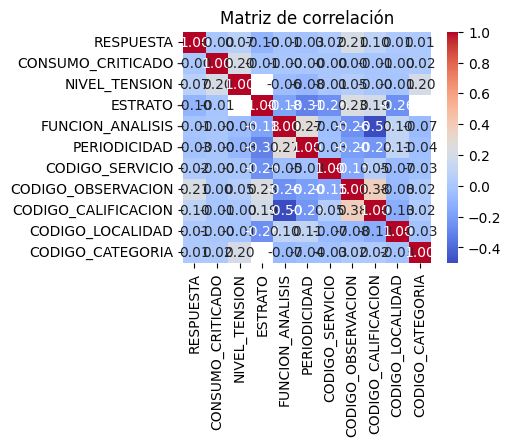

In [58]:
# Verificamos correlaci√≥n entre num√©ricas
plt.figure(figsize=(4, 3))
sns.heatmap(df_modelo.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaci√≥n")
plt.show()

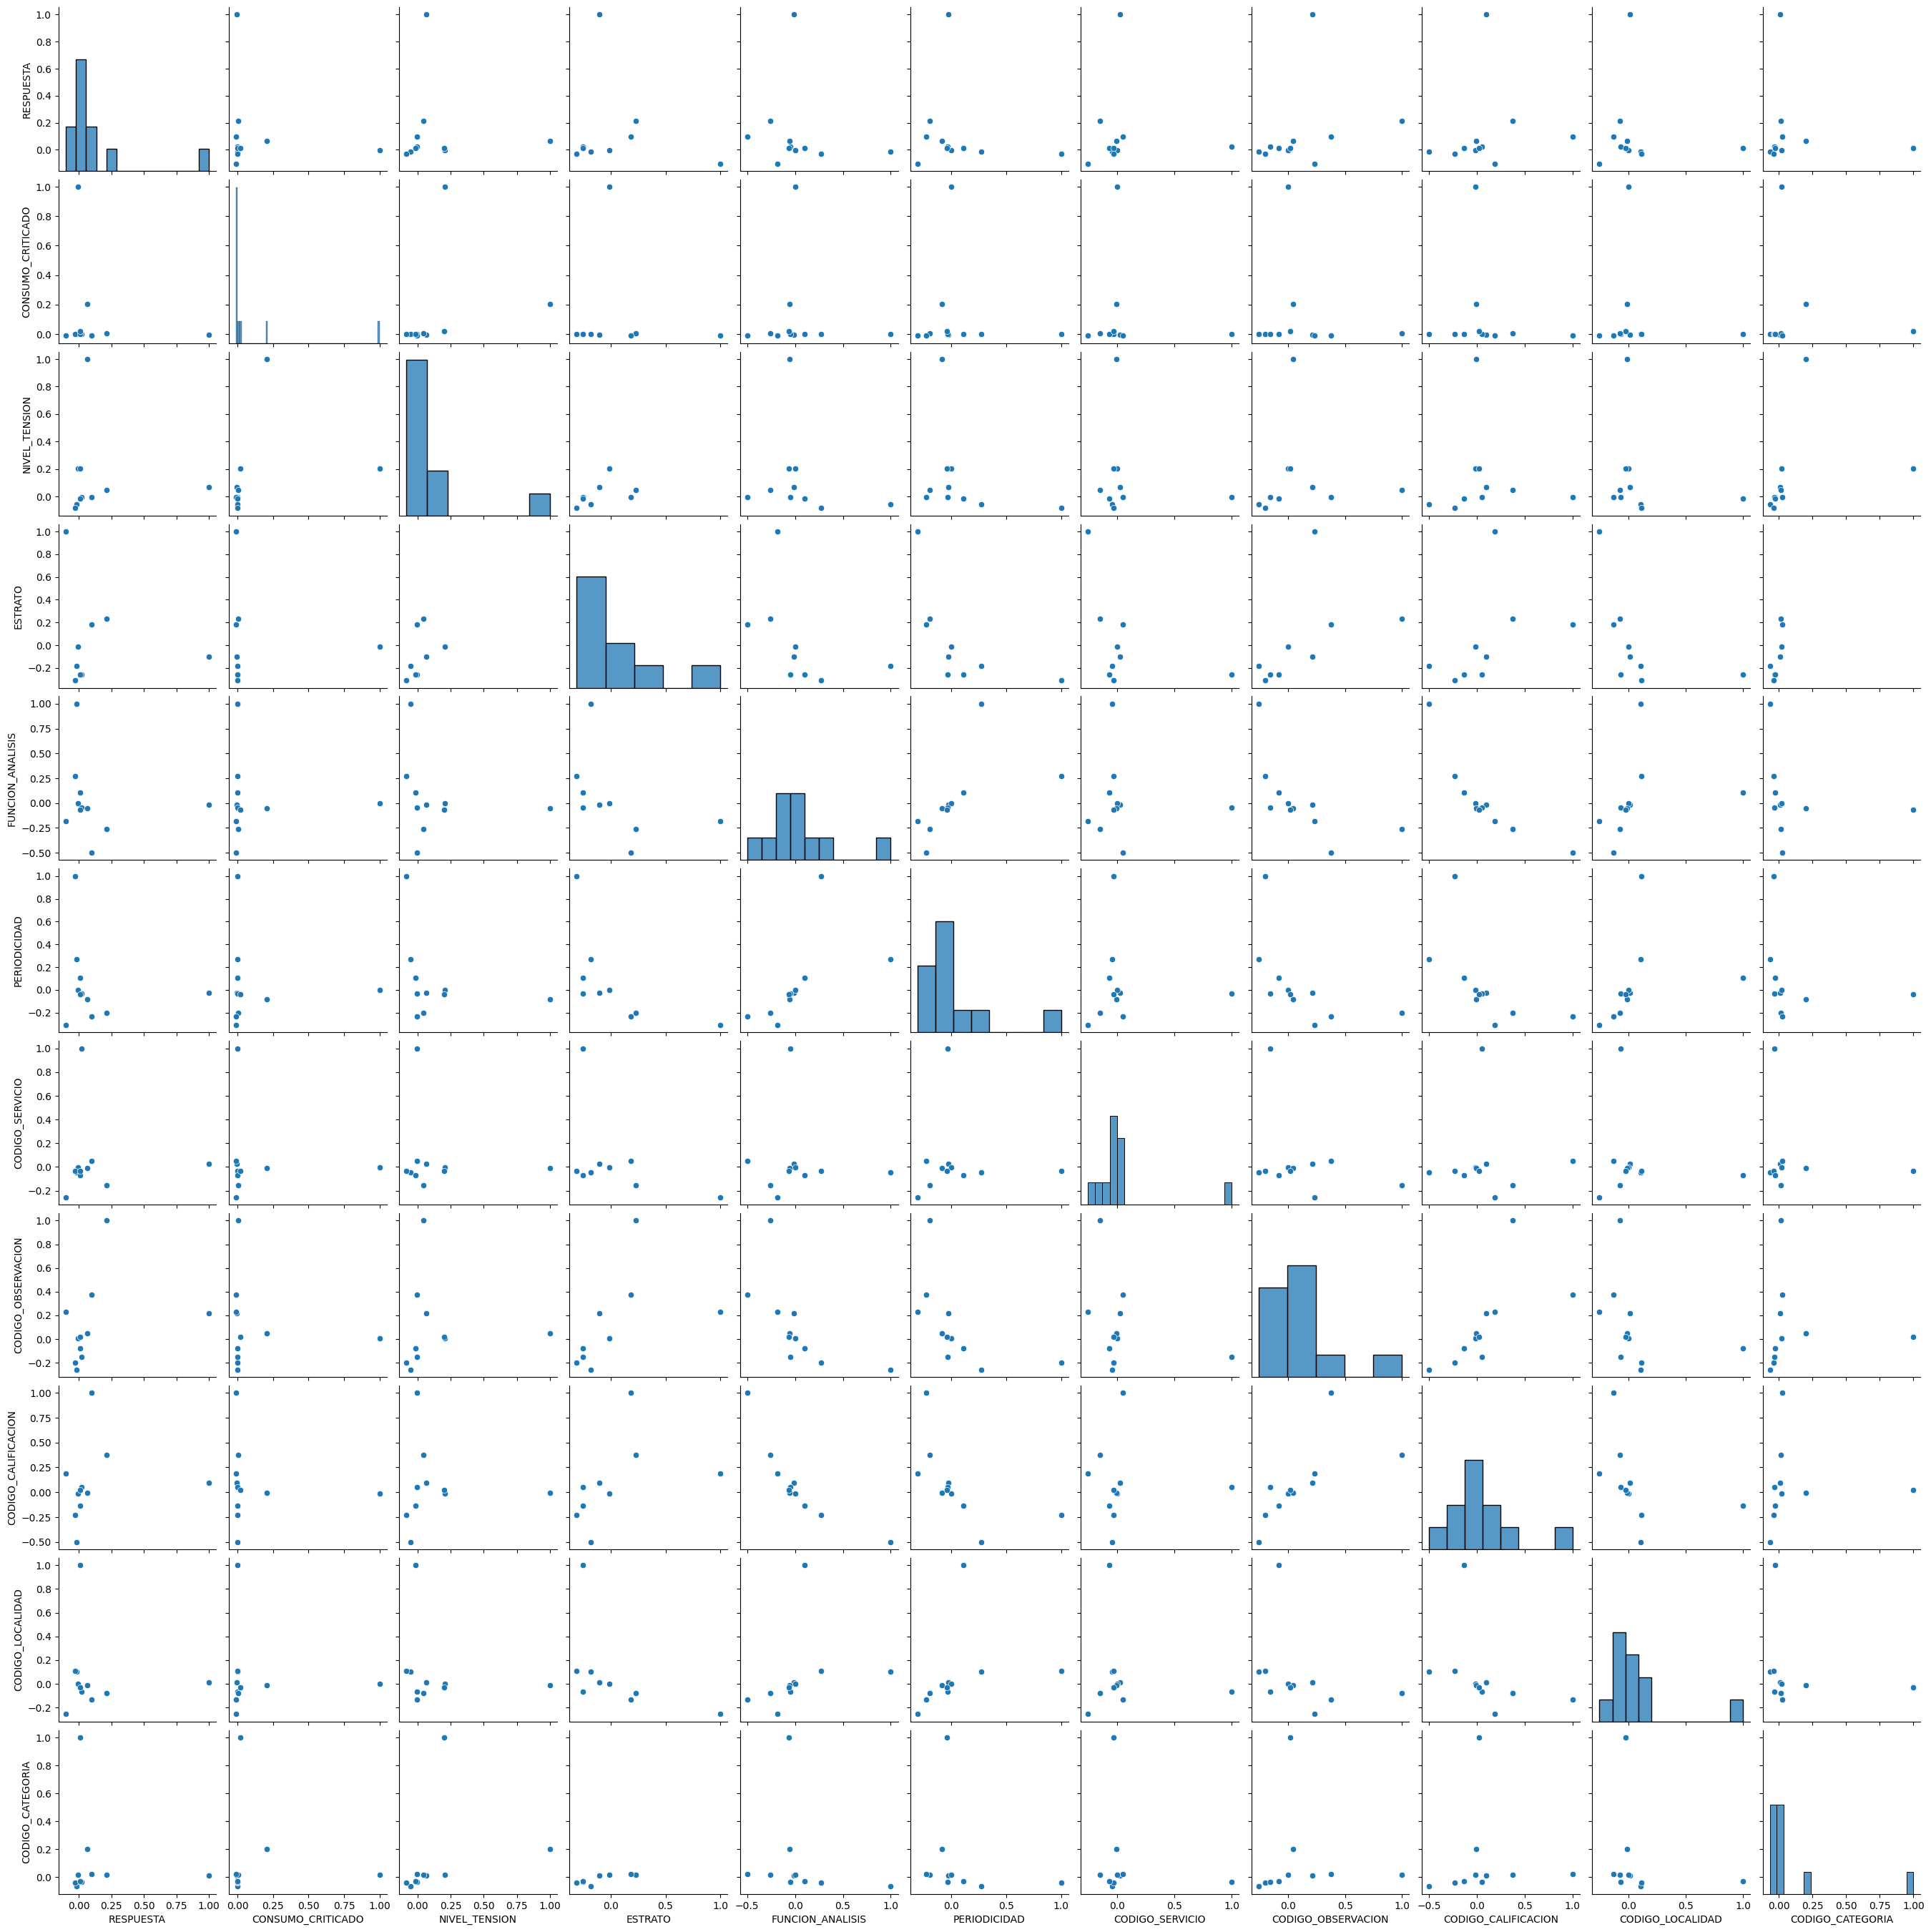

In [59]:
sns.pairplot(df_modelo.corr())